In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
invoice = pd.read_csv("fct_invoice.csv")

In [12]:
customer = pd.read_json("dim_customer.json")

In [14]:
customer

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [16]:
len(customer['id'])

5191

In [18]:
invoice

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [20]:
#2 What are the different categories of products available? 
invoice['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [22]:
#2 How many unique categories are there?
invoice['category'].nunique()

8

In [24]:
#3 Which payment method is the most popular? How many times was it used?
invoice['payment_method'].value_counts().head(1)

payment_method
Cash    44447
Name: count, dtype: int64

In [26]:
#1 What are the three most popular categories, by total sales?
invoice['sales'] = invoice['price'] * invoice['quantity']
invoice.groupby('category')['sales'].sum().sort_values(ascending=False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

In [28]:
merged_df = pd.merge(invoice, customer, how='inner', left_on='customer_id', right_on='id')
merged_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez


In [30]:
age_filt = merged_df[merged_df['age']>45]
merged_df['sales'] = merged_df['price'] * merged_df['quantity']
sales_filt = age_filt.groupby('age')['sales'].sum()
sales_filt.sum()

82039768.15

In [69]:
merged_df['invoice_date'] = pd.to_datetime(merged_df['invoice_date'], dayfirst = True)
merged_df['year'] = merged_df['invoice_date'].dt.year
merged_df['month'] = merged_df['invoice_date'].dt.month

df1 = pd.DataFrame(merged_df.groupby(['year', 'month']).sum(numeric_only=True)['sales'])
df1.reset_index(inplace=True)
df1

,year,month,sales
0,2021,1,9641614.62
1,2021,2,8772315.22
2,2021,3,9455359.38
3,2021,4,9389541.54
4,2021,5,9771756.97
5,2021,6,9286271.35
6,2021,7,10311119.68
7,2021,8,9630655.70
8,2021,9,9188165.62
9,2021,10,10263015.06


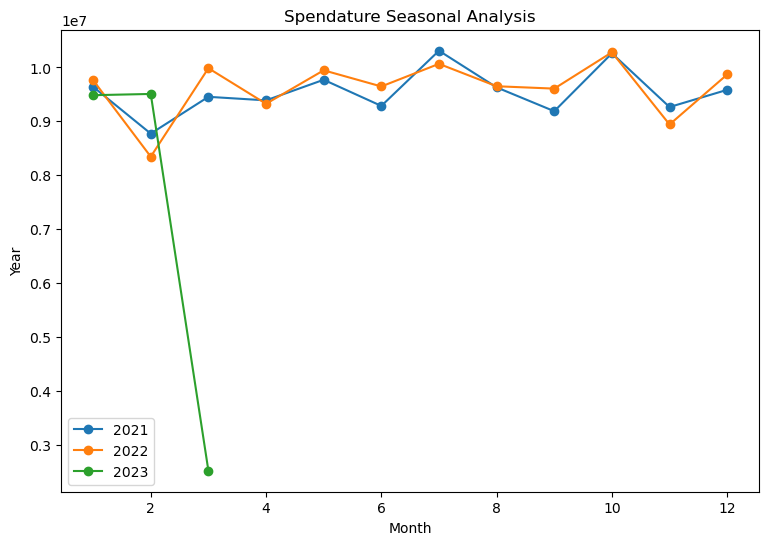

In [73]:
plt.figure(figsize=(9, 6))

for yr in df1['year'].unique():
    plt.plot(df1[df1['year'] == yr]['month'], df1[df1['year'] == yr]['sales'], marker='o', label = yr)
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.title('Spendature Seasonal Analysis')
    plt.legend()

In [55]:
merged_df['sales'] = merged_df['quantity'] * merged_df['price']

bins = [10,20,30,40,50,60,70,80,90]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
merged_df['age_ranges'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)

merged_df.pivot_table(index = 'category',columns='age_ranges', values = 'sales', aggfunc='sum')

age_ranges,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
